In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

2023-11-29 09:26:48.857041: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 09:26:48.914561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 09:26:49.669421: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "flowers/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path), #klasy nazwij tak, jak nazywają się foldery w folderze flowers
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [3]:
classes = os.listdir(root_path) #stwórz listę, w której będą nazwy klas. Stwórz ją na podstawie nazw folderów

In [4]:
classes

['daisy', 'dandelion', 'rose', 'tulip', 'sunflower']

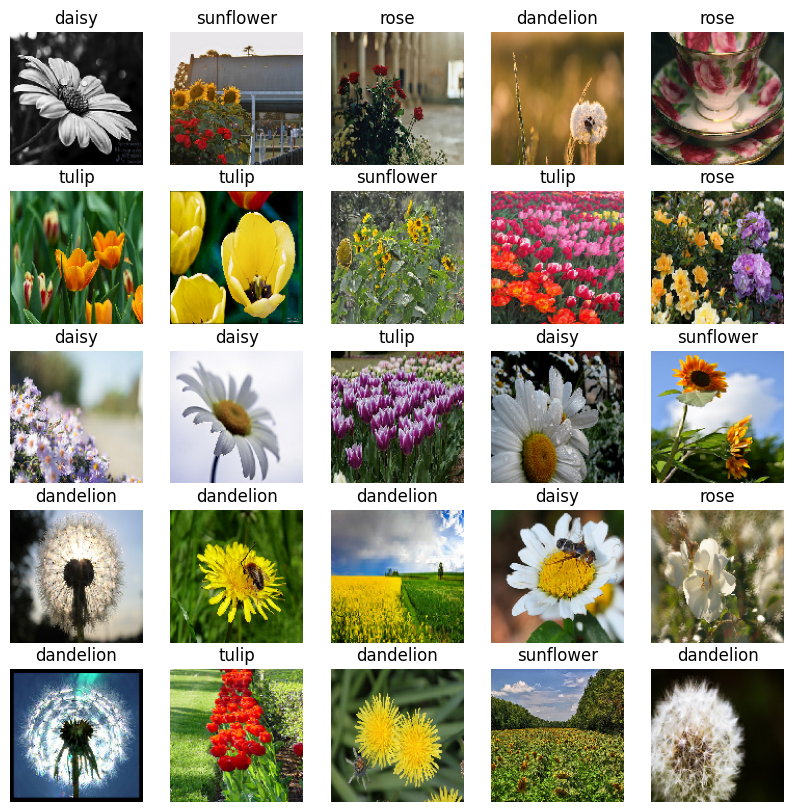

In [5]:
plt.figure(figsize=(10,10))
img, label = train_ds.next()
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(classes[np.argmax(label[i,:])])
    
# ponieważ labele są w formacie [0,0,1,0,0], poleceniem argmax sprawdzamy, na którym miejscu
# jest jedynka. W powyższym przykładzie na pozycji 2. Oznacza to, że taki label wskazuje 
# na "rose".
# classes[np.argmax(label[i,:])] ->
# classes[np.argmax([0,0,1,0,0])] ->
# classes[2] -> "rose"

    

In [ ]:
# Stwórz dwa modele.  
# Pierwszy bez augumentacji - dane należy wczytać na nowo.  Drugi z augumentacją i z 
# wykorzystaniem danych wczytanych u góry. Stwórz wykresy dla obu i porównaj.
# W pierwszym modelu dostosuj liczbę warstw maksymalizując accuracy. Następnie dla
# dokładnie takiego samego modelu powtórz te czynności, wykorzystując dane z augumentacją.